# State Graph

---


## Graph 1

Greeting Agent


In [3]:
from typing import TypedDict


class AgentState(TypedDict):  # Our state schema
    message: str


def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    state["message"] = "Hey " + state["message"] + ", how is your day going?"
    return state

In [ ]:
from langgraph.graph import StateGraph


graph = StateGraph(AgentState)

# Add node to the graph
graph.add_node("greeter", greeting_node)

# Add edges to the graph
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

# Compile the graph
app = graph.compile()

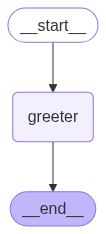

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"message": "Yash"})

In [7]:
result

{'message': 'Hey Yash, how is your day going?'}

## Graph 2

Multiple Input Agent


In [8]:
from typing import TypedDict, List, Optional


class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str


def process_values(state: AgentState) -> AgentState:
    """This functions handles multiple different inputs"""
    state["result"] = f"Hi, there, {state["name"]}! Your sum = {sum(state["values"])}"
    return state

In [ ]:
from langgraph.graph import StateGraph

graph = StateGraph(AgentState)

# Add node to the graph
graph.add_node("processor", process_values)

# Add edges to the graph
graph.set_entry_point("processor")
graph.set_finish_point("processor")

# Compile the graph
app = graph.compile()

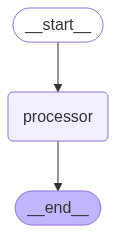

In [10]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke(AgentState(values=[1, 2, 3, 4], name="Yash"))
# or
# result = app.invoke({"values": [1, 2, 3, 4], "name": "Yash"})

In [12]:
result

{'values': [1, 2, 3, 4],
 'name': 'Yash',
 'result': 'Hi, there, Yash! Your sum = 10'}

In [13]:
result["result"]

'Hi, there, Yash! Your sum = 10'

## Graph 3

Multiple Input Agent with If-else


In [14]:
from typing import TypedDict, List, Literal
from math import prod


class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: Literal["+", "*"]
    answer: int
    result: str


def process_operation(state: AgentState) -> AgentState:
    """This node with going to perform the operation based on operator"""
    if state["operation"] == "+":
        state["answer"] = sum(state["values"])
    elif state["operation"] == "*":
        state["answer"] = prod(state["values"])
    else:
        raise ValueError(
            f"Operation provided is wrong, operation provided: {state["operation"]}, acceptable operations: [+, *]"
        )

    state["result"] = f"Hi {state["name"]}, your answer is: {state["answer"]}"
    return state

In [ ]:
from langgraph.graph import StateGraph

graph = StateGraph(AgentState)

# Add node to the graph
graph.add_node("operator", process_operation)

# Add edges to the graph
graph.set_entry_point("operator")
graph.set_finish_point("operator")

# Compile the graph
app = graph.compile()

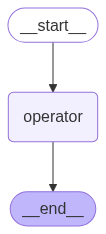

In [16]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result = app.invoke({"name": "Yash", "values": [1, 2, 3, 4], "operation": "+"})

In [18]:
result

{'name': 'Yash',
 'values': [1, 2, 3, 4],
 'operation': '+',
 'answer': 10,
 'result': 'Hi Yash, your answer is: 10'}